In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
#  Load the dataset
df= pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [6]:
df.sample(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
780,IND,India,Surajbari Creek Wind Farm,WRI1026087,30.0,23.3232,70.6417,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/filestorage/M/7/A/M7ACU...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
542,IND,India,NMDC Anehalu Wind Farm,WRI1026349,10.5,14.0980,76.3154,Wind,NaN,NaN,NaN,NaN,NMDC,CDM,https://cdm.unfccc.int/Projects/DB/RWTUV132388...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
305,IND,India,KADAMPARI,IND0000166,400.0,10.4104,77.0435,Hydro,NaN,NaN,NaN,1988.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,499.9875,410.56685,287.94305,382.4382,432.57625,NaN,Central Electricity Authority,NaN
706,IND,India,SHANAN,IND0000403,110.0,31.9894,76.8072,Hydro,NaN,NaN,NaN,1954.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,505.2809,529.90715,470.51560,505.9774,470.02805,NaN,Central Electricity Authority,NaN
34,IND,India,Askandra - Finehope Solar Power Plant,WRI1026108,5.0,27.3632,71.6918,Solar,NaN,NaN,NaN,NaN,Finehope Allied Engineering Private Limited,Lancosola,http://www.lancosolar.com/pdfs/rajasthan-pv-pr...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
#  DATASET SHAPE
df.shape

(907, 27)

In [126]:
#  CHECKING NULL VALUE
df.isnull().sum()
# This dataset has too many null values

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [7]:
df['other_fuel1'].value_counts()

# in 'other_fuel1' has 195 'oil' value out of 907 and 700 null value so i drop it 

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [8]:
#  all these  attributes values are contain too many null-value or most of  null-value, 
#      so there is no point in keeping these attributes

df= df.drop(['wepp_id','estimated_generation_gwh','generation_gwh_2013', 'generation_gwh_2019','other_fuel3',
            'other_fuel2','other_fuel1'], axis=1)


In [9]:
# creating a 'total_genration_gwh' by adding (generation_gwh_2014,2015,2016,2017, 2018)

df['total_generate_gwh']= df['generation_gwh_2014']+df['generation_gwh_2015']+df['generation_gwh_2016']+df['generation_gwh_2017']+df['generation_gwh_2018']

In [10]:
#   drop these attributes  (generation_gwh_2014,2015,2016,2017, 2018)

df.drop(['generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016','generation_gwh_2017','generation_gwh_2018'],
       axis=1, inplace=True)

In [11]:
#
df.sample(4)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_data_source,total_generate_gwh
201,IND,India,E.G. CANAL,IND0000110,15.00,NaN,NaN,Hydro,1996.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,NaN
76,IND,India,BHADRA,IND0000046,26.00,13.7008,75.6373,Hydro,1968.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,Central Electricity Authority,187.68685
637,IND,India,RAMPUR,IND0000366,412.02,31.4000,77.5927,Hydro,2013.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,Central Electricity Authority,9059.64415
566,IND,India,PAITHON,IND0000316,12.00,19.4834,75.3696,Hydro,1984.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,NaN


In [12]:
# ('owner','source','url') these attributes are not any important for predicting  target(total_geneeration_gwh) 
# in 'country' & 'country_long' attributes have only one value so thesee attributes no importance 

df = df.drop(['owner','source','url','country', 'country_long'], axis=1)


In [13]:
#
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [14]:
# impute  null values 'total_generate_gwh' by mean

df['total_generate_gwh'].fillna(df['total_generate_gwh'].mean(), inplace=True )

In [15]:
#
df['commissioning_year'].value_counts()

2015.0    28
2013.0    25
2012.0    23
2016.0    19
2010.0    18
          ..
1946.0     1
1956.0     1
1937.0     1
1949.0     1
1953.0     1
Name: commissioning_year, Length: 73, dtype: int64

In [16]:
# impute null value in 'commissioning_year' [2013.0, 2016.0, 2015.0,] by selecting random rows wise 

year= [2013.0, 2016.0, 2015.0,]
for y in year:
    a= df[df['commissioning_year'].isnull()].sample(100).index
    for i in a:
        df.loc[i,['commissioning_year']] = y

df['commissioning_year'].fillna(2015.0, inplace=True)

In [17]:

# fill Nan values of 'longitude' & 'latitude' by mean

df['latitude'].fillna(df['latitude'].mean(), inplace=True)
df['longitude'].fillna(df['longitude'].mean(), inplace=True)

In [18]:
df.sample(4)

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_data_source,total_generate_gwh
676,S.SAROVAR RBPH,IND0000383,1200.0,21.8301,73.7501,Hydro,2005.0,WRI,2019.0,Central Electricity Authority,6440.744450
112,Bamanwali Solar Power Plant,WRI1026114,1.0,28.3683,73.5286,Solar,2016.0,Industry About,NaN,NaN,13114.831488
577,PARE,IND0000540,110.0,27.2387,93.8107,Hydro,2018.0,WRI,2019.0,Central Electricity Authority,13114.831488
441,Lathi Solar Power Plant,WRI1026169,1.0,27.0321,71.5322,Solar,2015.0,Industry About,NaN,NaN,13114.831488


In [19]:
#    counting the values of 'year_of_capacity_data'

df['year_of_capacity_data'].value_counts()
#  this attribute contain only one type of variable so it don't matter to predict 'primary_fuel' or 'total_generation_gwh'

2019.0    519
Name: year_of_capacity_data, dtype: int64

In [20]:

df['gppd_idnr'].value_counts()  # 907 tyeps of values in 'gppd_idnr'

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

In [21]:
# drop some unnecessary features

df= df.drop(['name','generation_data_source','geolocation_source','year_of_capacity_data' ], axis=1)

In [22]:

df.isnull().sum()  # checking null value again

gppd_idnr             0
capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
commissioning_year    0
total_generate_gwh    0
dtype: int64

In [23]:
df.head(3)

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,total_generate_gwh
0,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,13114.831488
1,WRI1019881,98.0,24.7663,74.6090,Coal,2015.0,13114.831488
2,WRI1026669,39.2,21.9038,69.3732,Wind,2016.0,13114.831488


In [24]:
# Statistical description

df.describe()

,capacity_mw,latitude,longitude,commissioning_year,total_generate_gwh
count,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,2004.484013,13114.831488
std,590.085456,6.079148,4.812291,15.678986,13878.553807
min,0.000000,8.168900,68.644700,1927.000000,0.000000
25%,16.725000,17.072000,74.388900,1998.000000,7362.950625
50%,59.200000,21.281800,76.979200,2013.000000,13114.831488
75%,385.250000,25.176450,79.206100,2015.000000,13114.831488
max,4760.000000,34.649000,95.408000,2018.000000,156908.000000


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

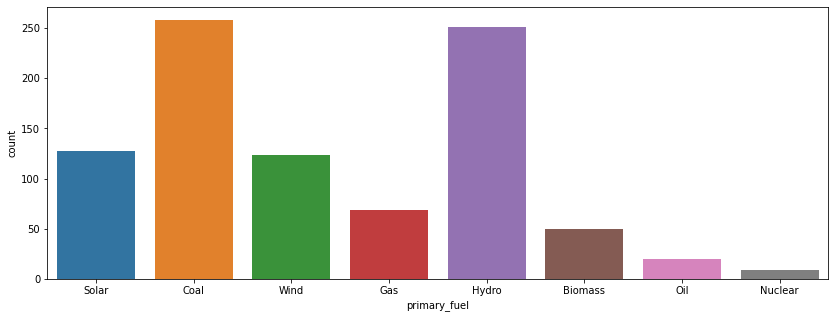

In [25]:
# plotting the countplot
plt.figure(figsize=(14,5))
sns.countplot(df['primary_fuel'])

#  In 'primary_fuel' maximum value is Coal & Hydro

<AxesSubplot:xlabel='commissioning_year', ylabel='count'>

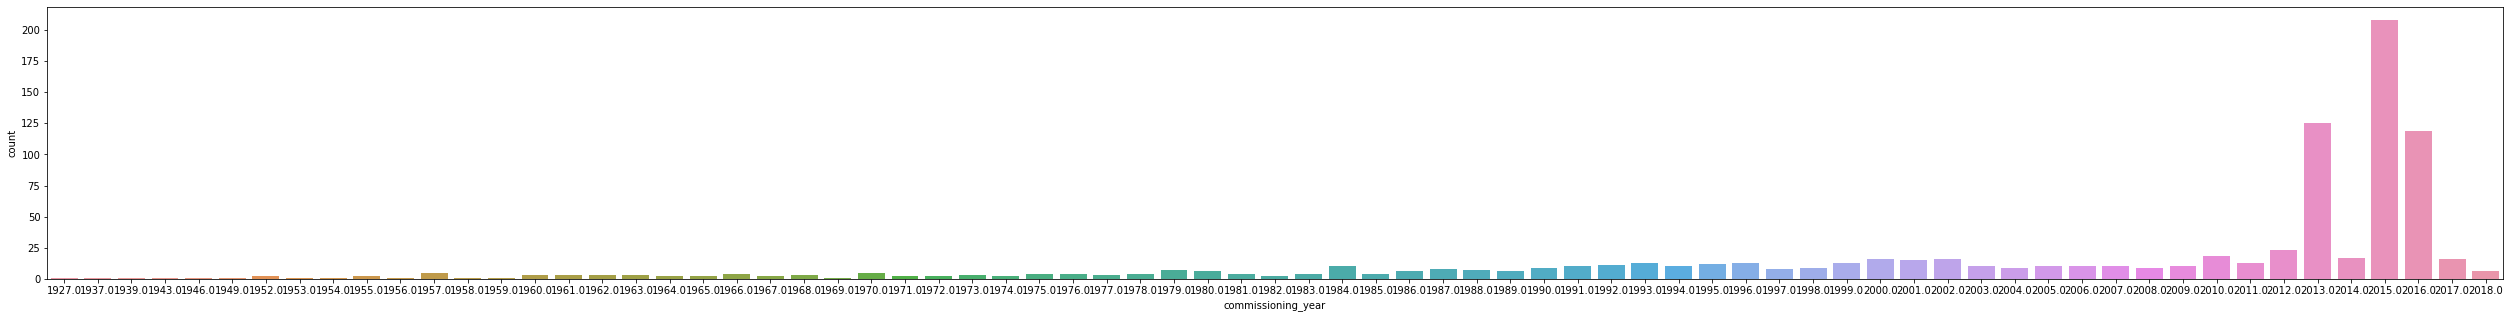

In [26]:
# plotting the countplot of 'commissioning_year'
plt.figure(figsize=(44,5))
sns.countplot(df['commissioning_year'])


<AxesSubplot:xlabel='commissioning_year'>

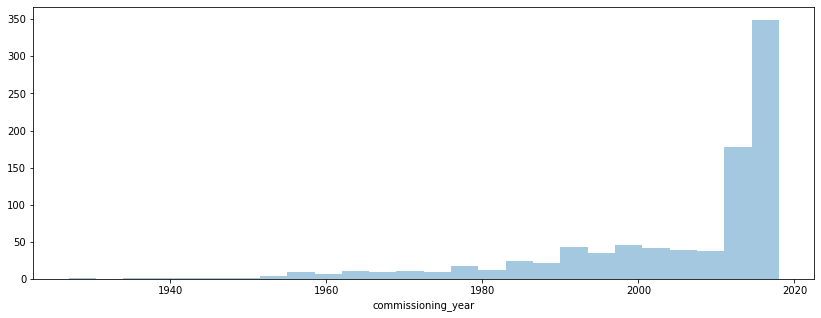

In [27]:
# plotting distribution plot of  'commissioning_year' for how the data is scattered
plt.figure(figsize=(14,5))
sns.distplot(df['commissioning_year'], kde=False)
#  maximum 'commissioning_year' data distributed is 2000 to 2018

<AxesSubplot:xlabel='total_generate_gwh'>

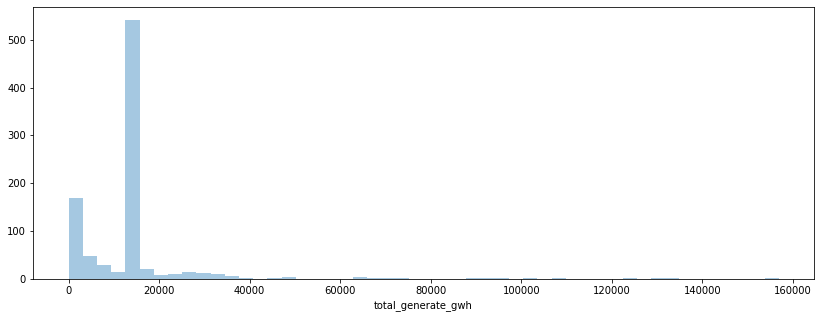

In [28]:
#plotting distribution plot of  'total_generate_gwh' for how the data is scattered

plt.figure(figsize=(14,5))
sns.distplot(df['total_generate_gwh'], kde=False)

<AxesSubplot:xlabel='capacity_mw'>

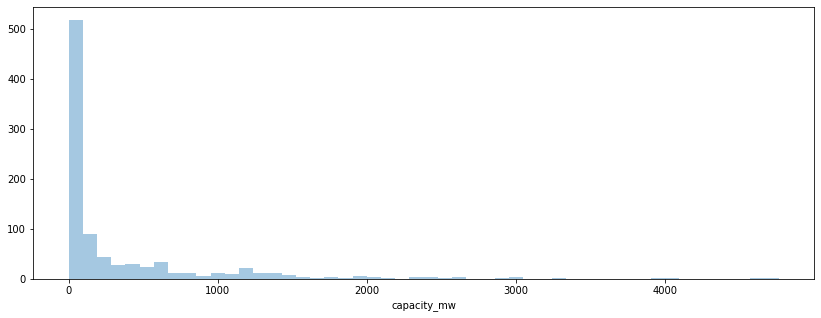

In [29]:
# plotting distribution plot of 'capacity_mw' 
plt.figure(figsize=(14,5))
sns.distplot(df['capacity_mw'], kde=False)

# shown in this distribution plot above 85 percent values betwenn 0.00 to 1000

<AxesSubplot:xlabel='primary_fuel', ylabel='total_generate_gwh'>

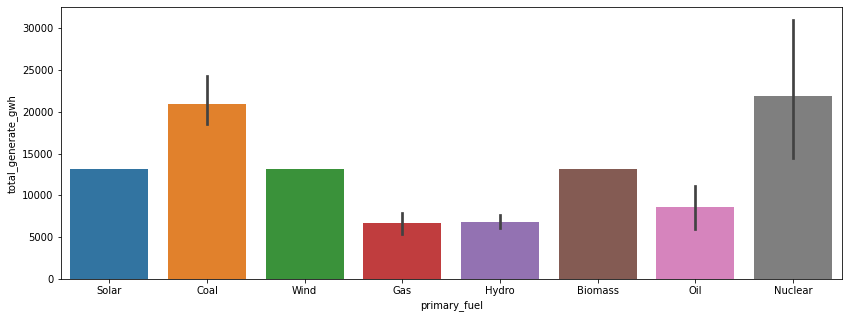

In [30]:
# plotting barplot 'primary_fuel' vs 'total_generate_gwh'

plt.figure(figsize=(14,5))
sns.barplot(df['primary_fuel']  ,df['total_generate_gwh'])

# Coal & Nuclear are higher 'total_generation_gwh'

<AxesSubplot:xlabel='capacity_mw', ylabel='total_generate_gwh'>

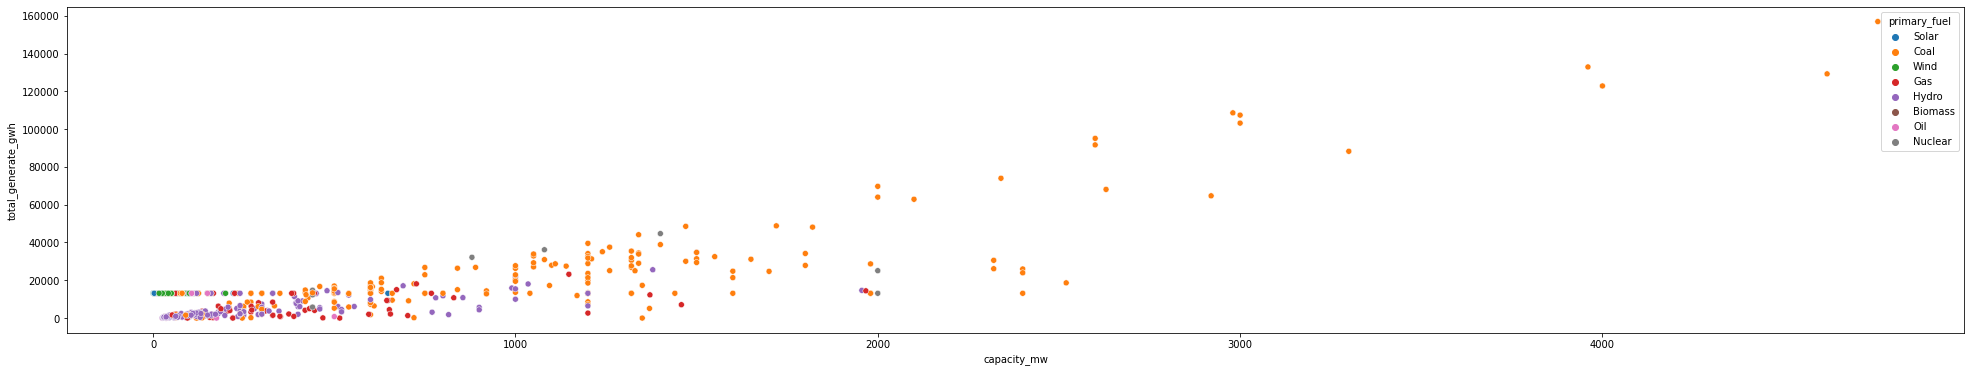

In [31]:
# plotting scatteplot 'capacity_mw' vs 'total_generate_gwh'
plt.figure(figsize=(34,6))
sns.scatterplot(df['capacity_mw']  ,df['total_generate_gwh'], hue=df['primary_fuel'])


<AxesSubplot:xlabel='commissioning_year', ylabel='total_generate_gwh'>

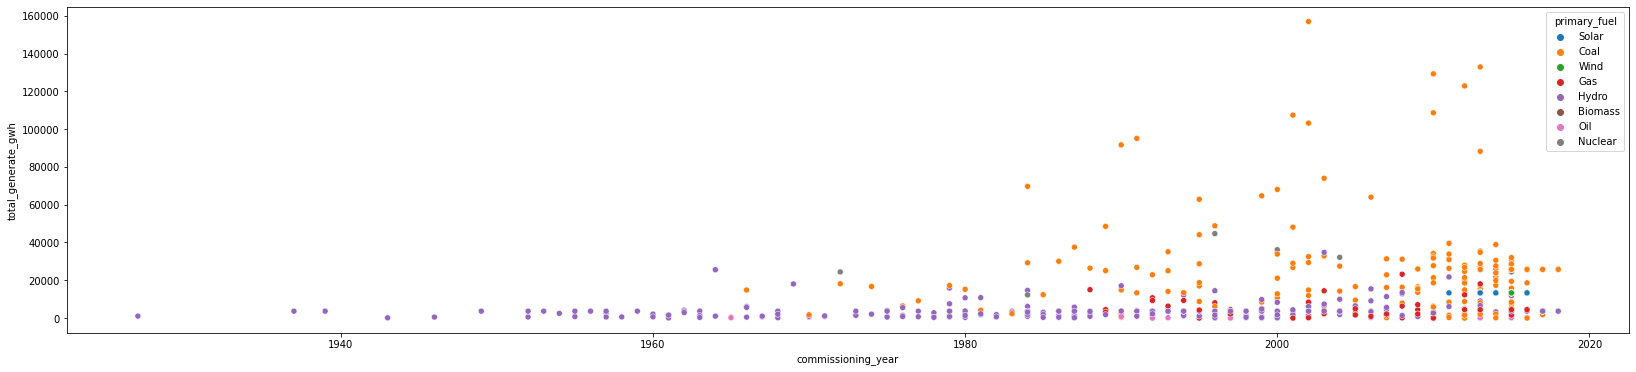

In [191]:
plt.figure(figsize=(28,6))
sns.scatterplot(df['commissioning_year']  ,df['total_generate_gwh'], hue=df['primary_fuel'])

# Until 1965 only hdro power plants had in india and another types of power plants in 1965 to 1983 was made very slowly
# since 1990 the production capacity in power-plants started incresing 

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,total_generate_gwh
0,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,13114.831488
1,WRI1019881,98.0,24.7663,74.6090,Coal,2015.0,13114.831488
2,WRI1026669,39.2,21.9038,69.3732,Wind,2016.0,13114.831488
3,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,3637.554320
4,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,27859.499736


In [34]:
# APPLY LABEL-ENCODING

c= ['gppd_idnr','primary_fuel']

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for i in c:
    df[i]= le.fit_transform(df[i])

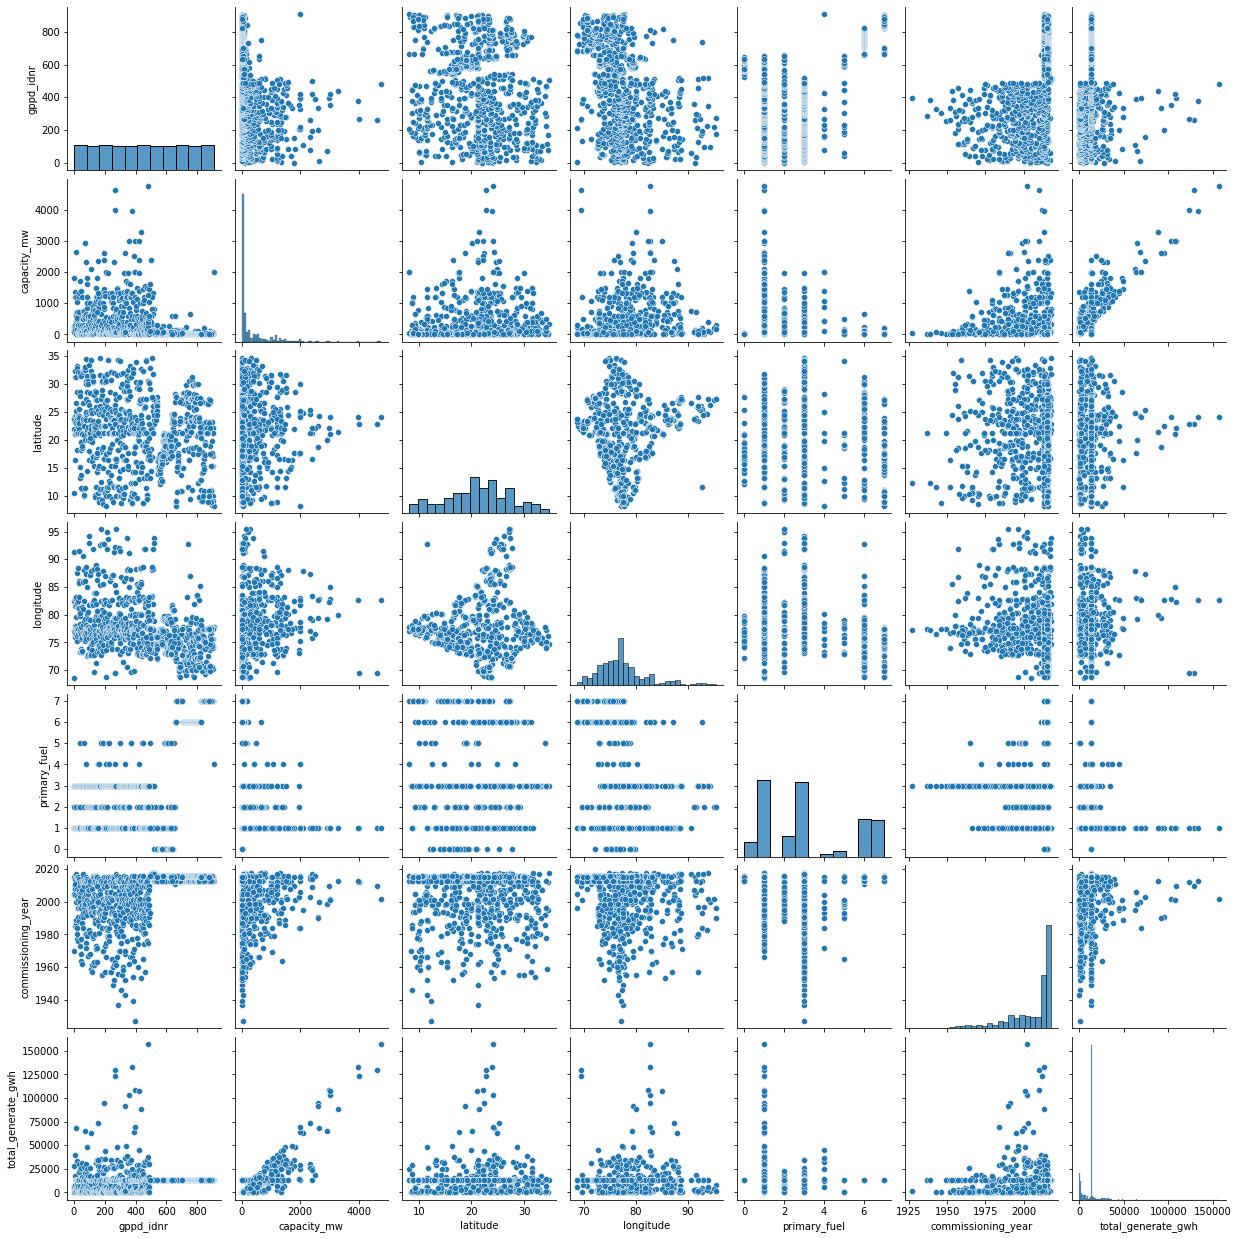

In [35]:
# plotting pairplot

sns.pairplot(df)
# no any Attributes looking positive related with 'total_gwh'

<AxesSubplot:>

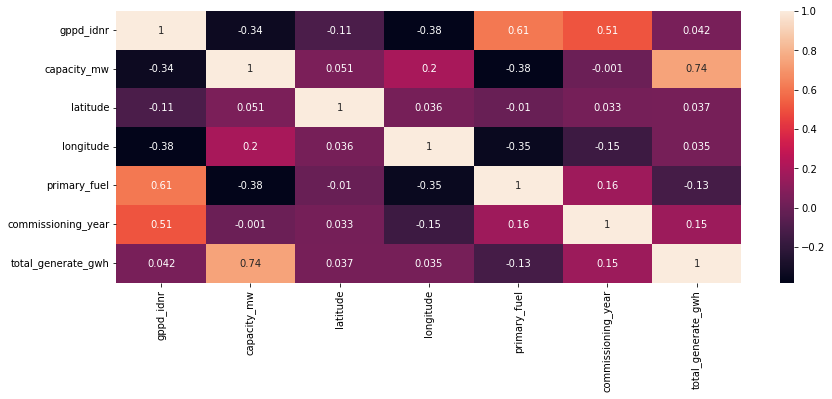

In [36]:
# plotting heatmap of dataset correlation

plt.figure(figsize=(14,5))
sns.heatmap(df.corr(), annot=True)
#
#  except 'capacity mw' no any attributes are correlated with 'total_generation-gwh'

In [37]:
df.head()

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,total_generate_gwh
0,657,2.5,28.1839,73.2407,6,2011.0,13114.831488
1,519,98.0,24.7663,74.6090,1,2015.0,13114.831488
2,853,39.2,21.9038,69.3732,7,2016.0,13114.831488
3,0,135.0,23.8712,91.3602,2,2004.0,3637.554320
4,1,1800.0,21.9603,82.4091,1,2015.0,27859.499736


In [38]:
#  CHECKING SKEWNESS
X= df[['capacity_mw','latitude','longitude',]]
X.skew()

capacity_mw    3.123576
latitude      -0.149698
longitude      1.141881
dtype: float64

In [39]:
#  removing skewness
for index in X.skew().index:
    if X.skew().loc[index]> 0.6:
        X[index]= np.log1p(X[index])
X.skew()

capacity_mw    0.135454
latitude      -0.149698
longitude      0.935663
dtype: float64

<AxesSubplot:xlabel='longitude'>

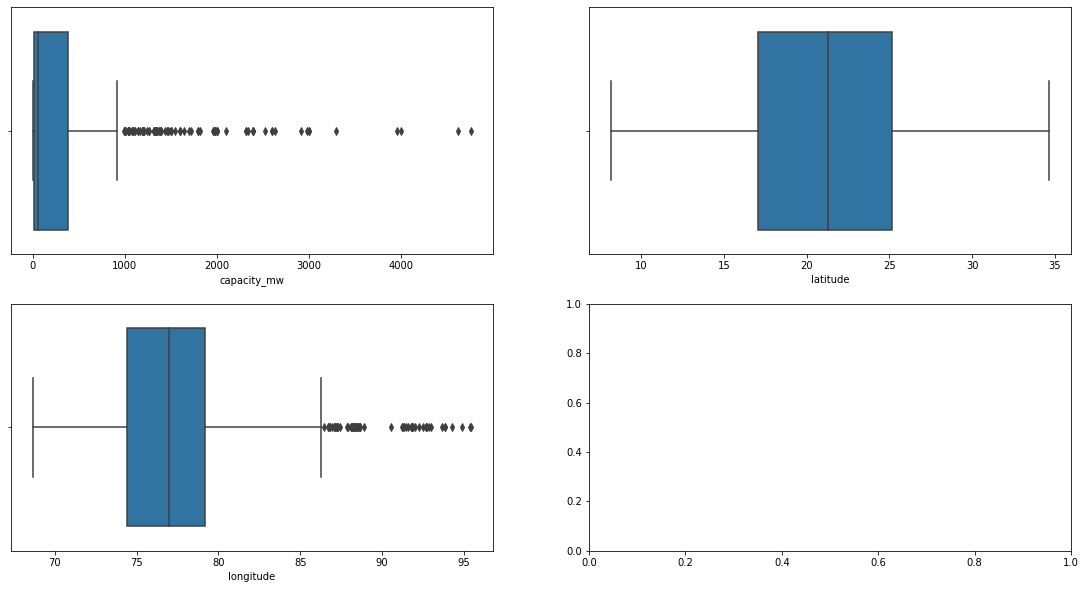

In [92]:
fig,axes= plt.subplots(2,2, figsize=(19,10))
sns.boxplot('capacity_mw' , data=df,ax=axes[0,0])
sns.boxplot('latitude', data=df,ax=axes[0,1])
sns.boxplot('longitude', data=df,ax=axes[1,0])

# boxplot shown some outliers in some Attributes

In [40]:
#  CHECKING OUTLIERS FROM Z_SCORE METHOD

from scipy.stats import zscore
(np.abs(zscore(X))<3).all()

capacity_mw     True
latitude        True
longitude      False
dtype: bool

In [41]:
# REMOVING  OUTLIER BY ZSCORE METHOD

from scipy.stats import zscore

z_scores=zscore(X)
df_new = df.loc[(abs(z_scores)<3).all(axis=1)]

print('original dataset shape', df.shape)
print('new dataset shape', df_new.shape)

original dataset shape (907, 7)
new dataset shape (895, 7)


In [43]:
df_new.head(3)

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,total_generate_gwh
0,657,2.5,28.1839,73.2407,6,2011.0,13114.831488
1,519,98.0,24.7663,74.6090,1,2015.0,13114.831488
2,853,39.2,21.9038,69.3732,7,2016.0,13114.831488


In [44]:
x1 = df_new.drop('primary_fuel', axis=1)

y1= df_new['primary_fuel']

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import *

In [48]:
#  SCALING THE DATASET WITH  STANDARDSCALER

sc= StandardScaler()
scaled= sc.fit_transform(x1)

scaled= pd.DataFrame(scaled, columns=x1.columns)

In [49]:
from sklearn.model_selection import cross_val_score as CVS
from sklearn.model_selection import KFold
kfold= KFold(n_splits=8, shuffle=True, random_state=49)


In [51]:
#        MAKE FUNCTION FOR BEST RANDOM_STATE     IN TRAINING PROCESS           # finding best random_state

def max_score1(model,scaled,y1):
    maxf= 0
    rs= 0
    for r_state in range(50,150):
        x_train, x_test,y_train,y_test= train_test_split(scaled,y1, test_size=0.30, random_state= r_state)

        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        tmp=accuracy_score(y_test,y_pred)
        #print("random state :",r_state," and f1 score: ",tmp)
        
        if tmp>maxf:
            maxf=tmp
            rs=r_state
            print("maximum accuracy_score is at random state :",rs," and it is :",maxf)


#   MAKE FUNCTION FOR TRAIN & TEST THE MODEL
    
def model_score1(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    pred= model.predict(x_train)
    y_pred= model.predict(x_test)
    print('training_score =', accuracy_score(y_train,pred))
        
    print('test-data accuracy_score=', accuracy_score(y_test,y_pred))
    print('classification_report \n', classification_report(y_test,y_pred), )
#    print('confusion_matrix \n', confusion_matrix(y_test,y_pred))
#    print('roc_auc_score =', roc_auc_score(y_test,y_pred))

def cross_val1(model,xtrain,ytrain,algo):
        
    cv_score= CVS(model,xtrain,ytrain,cv= kfold,)
    print('cross_val_score with', algo,'=', cv_score.mean())
    

In [53]:
#          LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
max_score1(lr,scaled,y1)

maximum accuracy_score is at random state : 50  and it is : 0.6654275092936803
maximum accuracy_score is at random state : 51  and it is : 0.6691449814126395
maximum accuracy_score is at random state : 52  and it is : 0.7174721189591078
maximum accuracy_score is at random state : 53  and it is : 0.7211895910780669
maximum accuracy_score is at random state : 56  and it is : 0.7434944237918215


In [70]:
#
x_train, x_test,y_train,y_test= train_test_split(scaled,y1, test_size=0.30, random_state= 56)
model_score1(lr,x_train,y_train,x_test,y_test)

training_score = 0.6773162939297125
test-data accuracy_score= 0.7434944237918215
classification_report 
               precision    recall  f1-score   support

           0       0.47      0.75      0.58        12
           1       0.74      0.81      0.77        73
           2       0.44      0.27      0.33        15
           3       0.86      0.82      0.84        87
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         5
           6       0.76      0.74      0.75        39
           7       0.70      0.76      0.73        37

    accuracy                           0.74       269
   macro avg       0.50      0.52      0.50       269
weighted avg       0.73      0.74      0.73       269



In [60]:
#   EXTRATREES_CLASSIFIER

from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
max_score1(etc,x1,y1)

maximum accuracy_score is at random state : 50  and it is : 0.8364312267657993
maximum accuracy_score is at random state : 51  and it is : 0.8475836431226765
maximum accuracy_score is at random state : 54  and it is : 0.8587360594795539
maximum accuracy_score is at random state : 57  and it is : 0.8847583643122676
maximum accuracy_score is at random state : 65  and it is : 0.9070631970260223


In [62]:
x_train, x_test,y_train,y_test= train_test_split(x1,y1, test_size=0.30, random_state= 65)
model_score1(etc ,x_train,y_train,x_test,y_test)


training_score = 1.0
test-data accuracy_score= 0.9107806691449815
classification_report 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       0.91      0.92      0.92        79
           2       0.69      0.43      0.53        21
           3       0.92      0.97      0.94        79
           4       0.00      0.00      0.00         1
           5       0.33      0.33      0.33         3
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        37

    accuracy                           0.91       269
   macro avg       0.71      0.70      0.70       269
weighted avg       0.90      0.91      0.90       269



In [65]:
#                KNN_ CLASSIFIER

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
max_score1(knn ,scaled,y1)


maximum accuracy_score is at random state : 50  and it is : 0.7695167286245354
maximum accuracy_score is at random state : 52  and it is : 0.7732342007434945
maximum accuracy_score is at random state : 53  and it is : 0.7769516728624535
maximum accuracy_score is at random state : 56  and it is : 0.7806691449814126
maximum accuracy_score is at random state : 57  and it is : 0.8066914498141264
maximum accuracy_score is at random state : 89  and it is : 0.8178438661710037
maximum accuracy_score is at random state : 137  and it is : 0.8215613382899628


In [69]:
#        KNN_ CLASSIFIER
x_train, x_test,y_train,y_test= train_test_split(scaled,y1, test_size=0.30, random_state= 189)
model_score1(knn ,x_train,y_train,x_test,y_test)

training_score = 0.8498402555910544
test-data accuracy_score= 0.7806691449814126
classification_report 
               precision    recall  f1-score   support

           0       0.82      0.78      0.80        18
           1       0.82      0.86      0.84        87
           2       0.69      0.46      0.55        24
           3       0.76      0.87      0.81        71
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         6
           6       0.73      0.89      0.80        27
           7       0.89      0.73      0.80        33

    accuracy                           0.78       269
   macro avg       0.59      0.57      0.57       269
weighted avg       0.76      0.78      0.77       269



In [80]:
#          RANDOMFOREST-CLASSIFIER

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(oob_score=True)
max_score1(rfc ,x1,y1)

maximum accuracy_score is at random state : 50  and it is : 0.8550185873605948
maximum accuracy_score is at random state : 54  and it is : 0.8661710037174721
maximum accuracy_score is at random state : 57  and it is : 0.895910780669145


In [81]:
#       RANDOMFOREST-CLASSIFIER
x_train, x_test,y_train,y_test= train_test_split(x1,y1, test_size=0.30, random_state= 65)
model_score1(rfc,x_train,y_train,x_test,y_test)


training_score = 1.0
test-data accuracy_score= 0.9033457249070632
classification_report 
               precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.91      0.89      0.90        79
           2       0.83      0.48      0.61        21
           3       0.87      0.99      0.92        79
           4       0.00      0.00      0.00         1
           5       0.50      0.33      0.40         3
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        37

    accuracy                           0.90       269
   macro avg       0.74      0.70      0.71       269
weighted avg       0.90      0.90      0.90       269



In [94]:
#  CROSS_VALIDATION  WITH  'ExtraTreesClassifier'

x_train, x_test,y_train,y_test= train_test_split(x1,y1, test_size=0.30, random_state= 65)
from sklearn.ensemble import ExtraTreesClassifier
ETC= ExtraTreesClassifier(bootstrap=True, oob_score=True)

cross_val1(ETC ,x_train,y_train, 'ExtraTreesClassifier')

cross_val_score with ExtraTreesClassifier = 0.7985840636157092


In [77]:
# APPLY CROSS_VALIDATION 

x_train, x_test,y_train,y_test= train_test_split(x1,y1, test_size=0.30, random_state= 65)

cross_val1(knn,x_train,y_train, 'LogisticRegression')   ##  CROSS_VALIDATION  WITH  'LogisticRegression'
print('.'*12)


cross_val1(knn,x_train,y_train,'KNeighborsClassifier')  ##  CROSS_VALIDATION  WITH  'KNeighborsClassifier'
print('.'*12)


cross_val1(rfc,x_train,y_train,'RandomForest')   ##  CROSS_VALIDATION  WITH  'RandomForestClassifier'


cross_val_score with LogisticRegression = 0.7426363193768257
............
cross_val_score with KNeighborsClassifier = 0.7426363193768257
............
cross_val_score with RandomForest = 0.8385670236936059


In [ ]:
HYPERPARAMETER-TUNING WITH GRIDSEARCHCV

In [82]:
#  HYPERPARAMATER TUNING                   '''' RANDOMFOREST-Classifier''''
from sklearn.model_selection import GridSearchCV

x_train, x_test,y_train,y_test= train_test_split(x1,y1, test_size=0.30, random_state= 65)
param= {'n_estimators':[100,180, 280],'max_depth':[6,8,9,10] ,'min_samples_split':[2,3],'min_samples_leaf':[1,2,3] }
grid3= GridSearchCV(rfc ,param, cv=kfold,)

grid3.fit(x_train,y_train)
print('best_parameter=', grid3.best_params_ ,'\n')


grid_RF = grid3.best_estimator_
grid_RF.fit(x_train, y_train)
pred = grid_RF.predict(x_test)

print('accuracy_score=', accuracy_score(y_test, pred))
print('classification_report=', classification_report(y_test, pred), '\n')


best_parameter= {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 180} 

accuracy_score= 0.8847583643122676
classification_report=               precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.88      0.90      0.89        79
           2       0.78      0.33      0.47        21
           3       0.86      0.96      0.91        79
           4       0.00      0.00      0.00         1
           5       0.33      0.33      0.33         3
           6       0.95      1.00      0.97        35
           7       1.00      0.95      0.97        37

    accuracy                           0.88       269
   macro avg       0.70      0.68      0.68       269
weighted avg       0.88      0.88      0.87       269
 



In [128]:
#  SAVE THE MODEL

import pickle

In [129]:
#
global_power_plant_fuel = 'global_power_plant_fuel.pickle'

pickle.dump(grid_RF,open(global_power_plant_fuel, 'wb'))

model= pickle.load(open(global_power_plant_fuel, 'rb'))

In [96]:
x= df_new.drop('total_generate_gwh', axis=1)   # input data

y= df_new['total_generate_gwh']             #  target-data

In [118]:
# make sure to multicollinearity is or not, use 'variance_inflation_factor' method to check  multicollinearity 

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

features= x.columns
vif_value= [vif(x.values, i) for i in range(len(x.columns))]

pd.DataFrame({'features':features,'vif_value':vif_value})   #
##   longitud,commissioning_year in these attributes have maulticollinearity_problem 

,features,vif_value
0,gppd_idnr,7.252919
1,capacity_mw,1.573991
2,latitude,13.377554
3,longitude,363.092704
4,primary_fuel,5.109801
5,commissioning_year,419.693681


In [97]:
#  SCALING THE DATASET WITH  STANDARDSCALER

sc= StandardScaler()
scaled1= sc.fit_transform(x)

scaled1= pd.DataFrame(scaled1, columns=x.columns)

In [98]:
#        MAKE FUNCTION FOR BEST RANDOM_STATE     IN TRAINING PROCESS           # finding best random_state
def max_score(model,scaled1,y):
    maxf= 0
    rs= 0
    for r_state in range(50,150):
        x_train, x_test,y_train,y_test= train_test_split(scaled1,y, test_size=0.30, random_state= r_state)

        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        tmp=r2_score(y_test,y_pred)
        #print("random state :",r_state," and f1 score: ",tmp)
        
        if tmp>maxf:
            maxf=tmp
            rs=r_state
            print("maximum r2_score is at random state :",rs," and it is :",maxf)
     

In [99]:
#   MAKE FUNCTION FOR TRAIN & TEST THE MODEL
    
def model_score(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    pred= model.predict(x_train)
    y_pred= model.predict(x_test)
    print('training_score =', r2_score(y_train,pred))
        
    print('test-data r2_score=', r2_score(y_test,y_pred))
    print('mean_squared_error ', mean_squared_error(y_test,y_pred), '\n')
    print('mean_absolute_error ', mean_absolute_error(y_test,y_pred))


def cross_val(model,xtrain,ytrain,algo):
        
    cv_score= CVS(model,xtrain,ytrain,cv= kfold,)
    print('cross_val_score with', algo,'=', cv_score.mean())
    

In [100]:
# let's use LINEAR-Regression

from sklearn.linear_model import LinearRegression
LR= LinearRegression()

max_score(LR,scaled1,y)

maximum r2_score is at random state : 50  and it is : 0.6084706465175189
maximum r2_score is at random state : 52  and it is : 0.6145869276000109
maximum r2_score is at random state : 53  and it is : 0.6914764956492523
maximum r2_score is at random state : 63  and it is : 0.7240865104248488


In [101]:
#   LINEAR-REGRESSION
x_train, x_test,y_train,y_test= train_test_split(scaled1,y, test_size=0.30, random_state= 63)
model_score(LR ,x_train,y_train,x_test,y_test)

training_score = 0.6101509473172737
test-data r2_score= 0.7240865104248488
mean_squared_error  56946398.22393974 

mean_absolute_error  4747.377633028246


In [102]:
# let's use    KNN-REGRESSOR

from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()
max_score(KNN,scaled1,y)

maximum r2_score is at random state : 50  and it is : 0.813606626071655
maximum r2_score is at random state : 57  and it is : 0.8237768691241166
maximum r2_score is at random state : 127  and it is : 0.8242770800077271
maximum r2_score is at random state : 146  and it is : 0.8253911405110925


In [103]:
#            KNN-REGRESSOR
x_train, x_test,y_train,y_test= train_test_split(scaled1 , y, test_size=0.30, random_state= 127)
model_score(KNN ,x_train,y_train,x_test,y_test)

training_score = 0.8201682148671067
test-data r2_score= 0.8242770800077271
mean_squared_error  31388010.702681374 

mean_absolute_error  3400.3938654641825


In [104]:
# let's use      DECISIONTREE-REGRESSOR

from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()

max_score(DT ,x,y)

maximum r2_score is at random state : 50  and it is : 0.8547428855000395
maximum r2_score is at random state : 53  and it is : 0.9053257370702344
maximum r2_score is at random state : 70  and it is : 0.908313689688582
maximum r2_score is at random state : 90  and it is : 0.9207366529642736


In [106]:
#    DECISIONTREE-REGRESSION
x_train, x_test,y_train,y_test= train_test_split(x,y, test_size=0.30, random_state= 90)
model_score(DT ,x_train,y_train,x_test,y_test)


training_score = 1.0
test-data r2_score= 0.9055099912946055
mean_squared_error  20115759.985249154 

mean_absolute_error  2012.6505346164492


In [107]:
# let's use       RANDOMFOREST-REGRESSOR

from sklearn.ensemble  import RandomForestRegressor
RF = RandomForestRegressor()

max_score(RF,x,y)

maximum r2_score is at random state : 50  and it is : 0.8901057358095933
maximum r2_score is at random state : 53  and it is : 0.9111469763978808
maximum r2_score is at random state : 90  and it is : 0.9217274755572221
maximum r2_score is at random state : 140  and it is : 0.9259974455190401


In [108]:
#   RANDOMFOREST-REGRESSOR

x_train, x_test,y_train,y_test= train_test_split(x,y, test_size=0.30, random_state= 90)
model_score(RF ,x_train,y_train,x_test,y_test)

training_score = 0.9712442754008835
test-data r2_score= 0.914363655682283
mean_squared_error  18230923.79724805 

mean_absolute_error  1883.7527808412137


In [111]:
# let's use         ADABOOST-REGRESSOR

from sklearn.ensemble import AdaBoostRegressor
AD = AdaBoostRegressor()

max_score(AD,scaled1,y)

maximum r2_score is at random state : 50  and it is : 0.8428221085023901
maximum r2_score is at random state : 69  and it is : 0.8811550013923096


In [114]:
#            ADABOOST-REGRESSOR
x_train, x_test,y_train,y_test= train_test_split( scaled1 ,y, test_size=0.30, random_state= 69)

model_score(DT ,x_train,y_train,x_test,y_test)

training_score = 1.0
test-data r2_score= 0.9079391665940707
mean_squared_error  24383714.025345396 

mean_absolute_error  2296.7828126484455


In [115]:
#  CROSS_VALDATION WITH  'DECISIONTREE-REGRESSION'

x_train, x_test,y_train,y_test= train_test_split(x,y, test_size=0.30, random_state= 90)
cross_val(DT,x_train,y_train,'DECISIONTREE-REGRESSION')
print('.'*12)

#  CROSS_VALDATION WITH  'KNN-REGRESSION'
x_train, x_test,y_train,y_test= train_test_split(scaled,y, test_size=0.30, random_state= 146)
cross_val(KNN,x_train,y_train,'KNN-REGRESSION')
print('.'*12)

#   # CROSS_VALDATION WITH    RANDOMFOREST -REGRESSOR
x_train, x_test,y_train,y_test= train_test_split(x,y, test_size=0.30, random_state= 90)
cross_val(RF,x_train,y_train,'RANDOMFOREST-REGRESSOR')
print('.'*12)

# CROSS_VALDATION WITH   ADABOOST-REGRESSOR
x_train, x_test,y_train,y_test= train_test_split(x,y, test_size=0.30, random_state= 69)
cross_val(AD,x_train,y_train,'ADABOOST-REGRESSOR')


cross_val_score with DECISIONTREE-REGRESSION = 0.6664002747326387
............
cross_val_score with KNN-REGRESSION = 0.9086786204194222
............
cross_val_score with RANDOMFOREST-REGRESSOR = 0.7743411512734314
............
cross_val_score with ADABOOST-REGRESSOR = 0.5712393779747216


In [117]:

#  HYPERPARAMATER TUNING                   '''' RANDOMFOREST-Regressor''''
from sklearn.model_selection import GridSearchCV

x_train, x_test,y_train,y_test= train_test_split(x,y, test_size=0.30, random_state= 59)
param= {'n_estimators':[100,180, 280],'max_depth':[6,8,9,10] ,'min_samples_split':[2,3],'min_samples_leaf':[1,2,3] }
grid1= GridSearchCV(RF ,param, cv=kfold,)

grid1.fit(x_train,y_train)
print('best_parameter=', grid1.best_params_ ,'\n')


G_RF = grid1.best_estimator_
G_RF.fit(x_train, y_train)
pred = G_RF.predict(x_test)

print('r2_score=', r2_score(y_test, pred))
print('mean_squared_error=', mean_squared_error(y_test, pred), '\n')
print('mean_absolute_error =', mean_absolute_error(y_test, pred))


best_parameter= {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100} 

r2_score= 0.9135782595876923
mean_squared_error= 17923638.102935396 

mean_absolute_error = 1882.4270380024623


In [121]:

#  HYPERPARAMATER TUNING                  '''' AdaBoost-Regressor''''

AD= AdaBoostRegressor()
x_train, x_test,y_train,y_test= train_test_split(scaled1,y, test_size=0.30, random_state= 69)
param= {'n_estimators':[100,180, 280],'learning_rate':[0.1, 0.37, 0.8, 1.01] ,'loss':['linear','exponential'] }
grid4 = GridSearchCV(AD ,param, cv=kfold,)

grid4.fit(x_train,y_train)
print('best_parameter=', grid.best_params_, '\n')
pred1 = grid4.predict(x_test)

#G_AD = grid2.best_estimator_
#G_AD.fit(x_train, y_train)
#pred1 = G_AD.predict(x_test)

print('r2_score=', r2_score(y_test, pred1))
print('mean_squared_error=', mean_squared_error(y_test, pred1), '\n')
print('mean_absolute_error =', mean_absolute_error(y_test, pred1))


best_parameter= {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100} 

r2_score= 0.8555834074791208
mean_squared_error= 38250934.32531484 

mean_absolute_error = 3912.2364547271845


In [126]:
pd.DataFrame({'y_test':y_test, 'predicted':pred1}).sample(10)

,y_test,predicted
157,9487.736800,7302.975412
701,692.430450,6852.871977
728,1039.307350,6852.871977
474,26389.438000,12631.277041
171,16975.177000,7064.734444
905,13114.831488,12749.017961
821,19454.942650,16996.794764
803,4660.382000,7172.273695
397,13114.831488,12649.769947
302,13114.831488,12649.769947


In [130]:
#
global_power = 'global_power.pickle'

pickle.dump(grid_RF,open(global_power, 'wb'))

#
model= pickle.load(open(global_power, 'rb'))